In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import statistics

In [2]:
def BSM_call(S0, strike, T_days, sigma, rate):
    nd = statistics.NormalDist(0,1)
    d1 = (np.log(S0/strike)+(rate+sigma*sigma/2)*T_days/365.25)/sigma/math.sqrt(T_days/365.25)
    d2 = d1 - sigma * math.sqrt(T_days/365.25)
    return S0*nd.cdf(d1) -  strike*math.exp((-1)*rate*T_days/365.25)*nd.cdf(d2)
def BSM_put(S0, strike, T_days, sigma, rate):
    nd = statistics.NormalDist(0,1)
    d1 = (np.log(S0/strike)+(rate+sigma*sigma/2)*T_days/365.25)/sigma/math.sqrt(T_days/365.25)
    d2 = d1 - sigma * math.sqrt(T_days/365.25)
    return -S0*nd.cdf(-d1) +  strike*math.exp((-1)*rate*T_days/365.25)*nd.cdf(-d2)

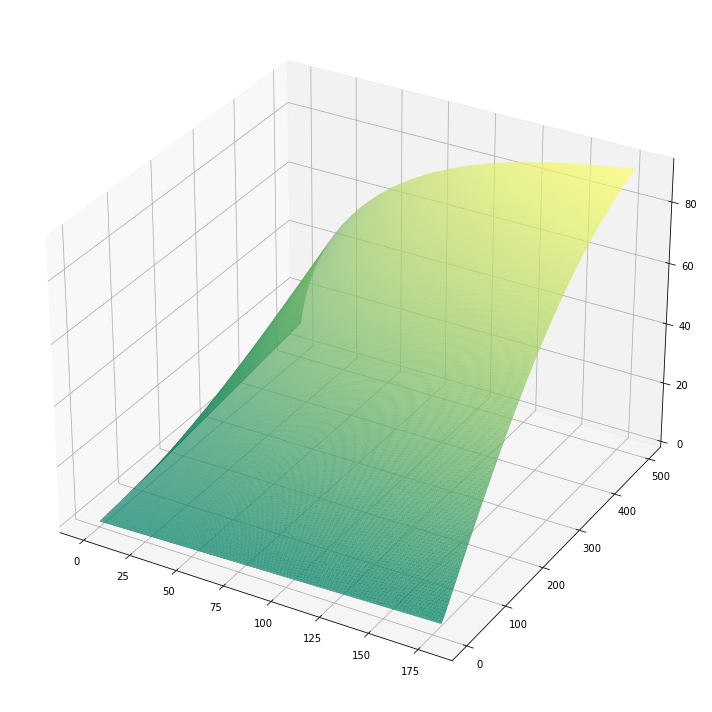

In [15]:
triple = np.zeros((180*500,3))
for i in range(1,180):
    for j in range(1,500):
        triple[j-1 + (i-1)*499, 0] = i #this is time in days, coord Ox
        triple[j-1 + (i-1)*499, 1] = j #this is volatility, coord Oy
        triple[j-1 + (i-1)*499, 2] = BSM(100, 100, i, j/100, 0.05) # the correspond option price, coord Oz
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(triple[:,0],triple[:,1],triple[:,2], cmap='summer', edgecolor='none')
fig.tight_layout()

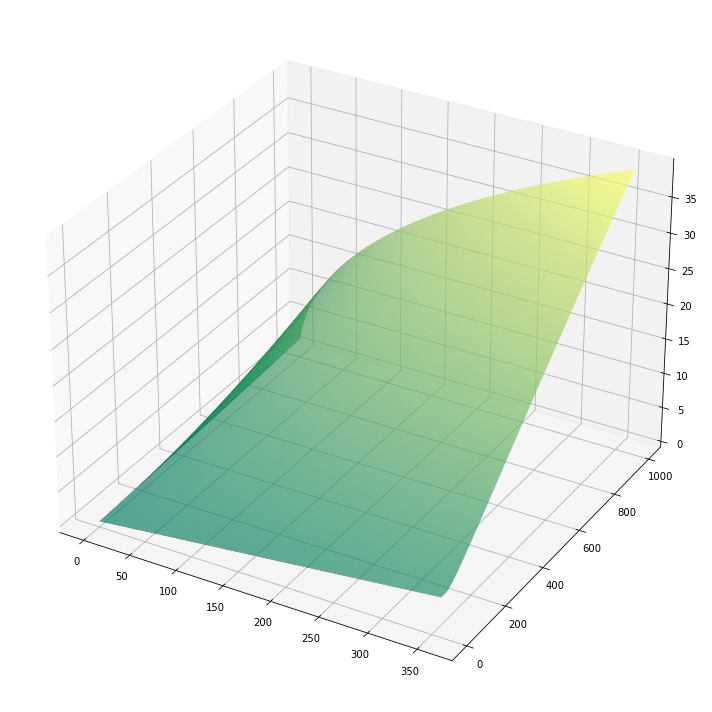

In [89]:
triple = np.zeros((360*1000,3))
for i in range(1,360):
    for j in range(1,1000):
        triple[j-1 + (i-1)*999, 0] = i #this is time in days, coord Ox
        triple[j-1 + (i-1)*999, 1] = j #this is volatility, coord Oy
        triple[j-1 + (i-1)*999, 2] = BSM(100, 100, i, j/1000, 0.05) # the correspond option price, coord Oz
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(triple[:,0],triple[:,1],triple[:,2], cmap='summer', edgecolor='none')
fig.tight_layout()

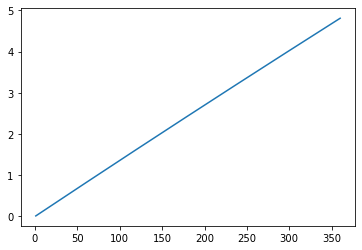

In [87]:
grap = np.zeros(360)
for i in range(360):
    grap[i] = BSM(100, 100, i+1, 0.0000001, 0.05)
#print(grap)
plt.plot(np.arange(1,361),grap)
plt.show()

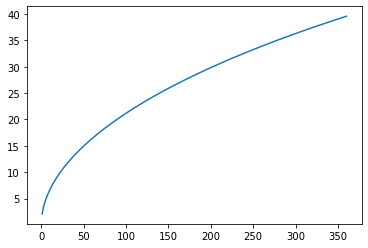

In [88]:
grap = np.zeros(360)
for i in range(360):
    grap[i] = BSM(100, 100, i+1, 1, 0.05)
#print(grap)
plt.plot(np.arange(1,361),grap)
plt.show()